<a href="https://colab.research.google.com/github/sunn-e/HER/blob/dev/HER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Hello World

# Hackintine presented by Precisely
## Hackathon Submission Notebook
### Theme: Build a recommendation engine
- Given Precisely’s dataset of opportunities, cluster them based on relevant semantic meanings [ 54 points ]
Example: If there is an opportunity for computer science students and another opportunity related to Machine Learning, they should be clustered closer together, when compared with a Social Sciences opportunity
- Given a dataset of user preferences, recommend opportunities from the opportunity dataset [ 54 points ]

# About me

I am currently a final year Computer Science and Engineering undergrad from Indian Institute Of Information Technology, Nagpur,India. (https://iiitn.ac.in). 

I am also working as a Google Summer of Code Student developer for https://r-project.org

During the hackintine of my academic career, I also managed to accrue nearly 7 months of professional work experience. 
I had the privilege of working for All India Reporter(est. 1922) in a Machine Learning Engineer Intern role.
I learned to use Python to solve complex Natural Language Processing problems, built NLP pipelines using Tensorflow 2.0, Spacy, NLTK, integrating Twilio, WhatsApp API, ChatterBot API and deployment using Heroku and PythonAnywhere. I also played a lot with IBM Watson Studio and Amazon Web Services. 
I use GitHub to manage all my personal projects and consulting work because of trust issues with hardware.

I prefer to be a generalist than a specialist. Whether working on academic, extracurricular, or professional projects, I apply proven problem-solving, teamwork, and research skills, which I hope to leverage into an innovative Software Developer role . 

I actively participate in open source competitions. When I'm free,I usually write on Quora/Medium or tinker  projects and put them on GitHub.

If that sounds interesting, hit me up!

References:
1) https://github.com/sunn-e
2) sunnydhoke22+Ln@gmail.com | sunny.dhoke+Ln@cse.iiitn.ac.in
3) https://www.aironline.in/
4) https://www.airinfotech.in
5) https://medium.com/@sunnydhoke22
6) https://dev.to/sunne

Whatever you are, be a good one..

# HER : Hackintine Engine for Recommendation

HER(she|?) is a recommendation engine based on unsupervised learning approach of machine learning. 

## Let the story begin

Okay, so I started with getting the data from awesome team of Precisely. The data was inititally in pdf and excel format. There were 3 files. 
- user agreement
- user data
- item data

Notice: The user agreement is for me and use of data, the legeal stuff. I read it and state that this data is only for educational purpose. Me nor precisely is responsible for any misuse.

Well, that being said, let's start, I first converted user data pdf and item data excel file to csv format.

This will help with pandas Though pandas can support excel, I just prefer everything to be consistent in a system. The data is inside data/ folder. 

I loaded the data using pandas.Initially I want to only work with item data as once once we decide what has to be recommended can be recommended to user easily since we have a user's dicscipline data.


Then I did some EDA to find what are the cardinalities and how the data actually looks like. 

The data is high in cardinality in most columns. This toughens our situation as unsupervised learning needs us to define few parameters.

For some experiment, I find out that we can guess what can be k - value. 
```
Humanities and Social Sciences	
2328
All	
992
Management	
 
403
Engineering and Technology	
 
362
Humanities and social sciences	
 
362
Other values (101)	
1036 

```
As you can see, we have 5+1 rough categories. For the simplicity, I made a k-means model to train with k =6, so as to get properly clustered "clusters".

But, due to again high cardinality, we see that there are way too many repeatations in all cluters. 

I saved this model under models format `k-5+1.sav`
Solution to overcome that? 
Haha.. GO BRUTEFORCE. I tried for all values of K from 1 to 40. 
Then plotted the graph and checked where the graph slope get's flat.

Lucky for me, it got flat before it hit k =40. Otherwise I would have to increase k to 50 and keep hoping for slope to get parallel to x-axis.

Neverthless, I chose k =38 as it was quite evident from my experiment for this value of k, I am getting pretty good indicators.

Also, I want to avoid 40 as otherwise it's just overfitting. Overfitting is bad, we need generalised approach. :p




In [0]:
import pandas as pd

In [0]:
hackintine_df = pd.read_csv("Opportunity Dataset.csv", error_bad_lines=False)

b'Skipping line 5502: expected 11 fields, saw 12\nSkipping line 5503: expected 11 fields, saw 12\nSkipping line 5504: expected 11 fields, saw 12\nSkipping line 5505: expected 11 fields, saw 12\nSkipping line 5506: expected 11 fields, saw 12\nSkipping line 5507: expected 11 fields, saw 12\nSkipping line 5508: expected 11 fields, saw 12\nSkipping line 5509: expected 11 fields, saw 12\nSkipping line 5510: expected 11 fields, saw 12\nSkipping line 5511: expected 11 fields, saw 12\nSkipping line 5512: expected 11 fields, saw 12\nSkipping line 5513: expected 11 fields, saw 12\nSkipping line 5514: expected 11 fields, saw 12\nSkipping line 5515: expected 11 fields, saw 12\nSkipping line 5516: expected 11 fields, saw 12\nSkipping line 5517: expected 11 fields, saw 12\nSkipping line 5518: expected 11 fields, saw 12\nSkipping line 5519: expected 11 fields, saw 12\nSkipping line 5520: expected 11 fields, saw 12\nSkipping line 5521: expected 11 fields, saw 12\nSkipping line 5522: expected 11 fields

In [0]:
hackintine_df.head()

,ID,Headline,Description,Funding,Deadline,Type of opportunity,Sub tags,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,1,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,NaN,2019-10-15,Conferences,NaN,Humanities and Social Sciences,Bachelors,All,USA
1,2,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,NaN,2019-09-15,Conferences,NaN,Engineering and Technology,Masters,All,USA
2,3,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,NaN,2019-10-15,Competitions,NaN,Engineering and Technology,All,All,USA
3,4,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,NaN,2019-09-15,Competitions,NaN,Engineering and Technology,All,All,USA
4,5,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,NaN,2019-12-01,Competitions,NaN,Engineering and Technology,All,All,Mozambique


In [0]:
print(hackintine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      5511 non-null   object
 1   Headline                                5511 non-null   object
 2   Description                             5498 non-null   object
 3   Funding                                 2097 non-null   object
 4   Deadline                                5496 non-null   object
 5   Type of opportunity                     5485 non-null   object
 6   Sub tags                                2607 non-null   object
 7   Discipline                              5483 non-null   object
 8   Minimum Qualification / Applicable for  5466 non-null   object
 9   Countries eligible                      5488 non-null   object
 10  Location of opportunity                 5486 non-null   object
dtypes: o

In [0]:
# hackintine with no description won't be of much use
hackintine_df = hackintine_df.dropna(how='any')

In [0]:
# Combine three columns namely: hackintineId, hackintineTitle, Description
comb_frame = hackintine_df.ID.str.cat(" "+hackintine_df.Headline.str.cat(" "+hackintine_df.Description))

In [0]:

comb_frame = comb_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

In [0]:
#tf-idf weight which signifies the importance of term

In [0]:
#text to vector 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)

In [0]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=90af06e75ac97272a9e5e8bbfcf030dc4c7deea0613f3af5a3a2cec3bbc17a17
  Stored in directory: /tmp/pip-ephem-wheel-cache-hmv8hktw/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
from pandas_profiling import ProfileReport

df = pd.read_csv("Opportunity Dataset.csv", error_bad_lines=False)
ProfileReport(df, title='Precisely Opportunity Data Report', explorative=True)


b'Skipping line 5502: expected 11 fields, saw 12\nSkipping line 5503: expected 11 fields, saw 12\nSkipping line 5504: expected 11 fields, saw 12\nSkipping line 5505: expected 11 fields, saw 12\nSkipping line 5506: expected 11 fields, saw 12\nSkipping line 5507: expected 11 fields, saw 12\nSkipping line 5508: expected 11 fields, saw 12\nSkipping line 5509: expected 11 fields, saw 12\nSkipping line 5510: expected 11 fields, saw 12\nSkipping line 5511: expected 11 fields, saw 12\nSkipping line 5512: expected 11 fields, saw 12\nSkipping line 5513: expected 11 fields, saw 12\nSkipping line 5514: expected 11 fields, saw 12\nSkipping line 5515: expected 11 fields, saw 12\nSkipping line 5516: expected 11 fields, saw 12\nSkipping line 5517: expected 11 fields, saw 12\nSkipping line 5518: expected 11 fields, saw 12\nSkipping line 5519: expected 11 fields, saw 12\nSkipping line 5520: expected 11 fields, saw 12\nSkipping line 5521: expected 11 fields, saw 12\nSkipping line 5522: expected 11 fields

# I found that under discipline, we have 5 major desciplines with 1 other.

## It makes sense that we use unsupervised learning and try to cluster our precisely data with k = 5+1 clusters. The clusters will be a good point to start and recommend users from opportunities from those discipline depending on the user's preference. 

In [0]:
true_k = 5 +1
"""
Humanities and Social Sciences	
2328
All	
992
Management	
 
403
Engineering and Technology	
 
362
Humanities and social sciences	
 
362
Other values (101)	
1036 
"""

'\nHumanities and Social Sciences\t\n2328\nAll\t\n992\nManagement\t\n \n403\nEngineering and Technology\t\n \n362\nHumanities and social sciences\t\n \n362\nOther values (101)\t\n1036 \n'

In [0]:
# Running model with 15 different centroid initializations & maximum iterations are 500
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Save machine learning model
import pickle
filename = 'finalized_model-k-is-5+1.sav'
pickle.dump(model, open(filename, 'wb'))

In [0]:
# Top terms in each clusters.
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 pistessolidaires
 organisation
 france
 french
 2002
 evs
 thats
 volunteers
 heart
 vacancies
 organisations
 mobility
 17
 activities
 chance
Cluster 1:
 research
 conference
 rw
 heads
 scholars
 development
 technology
 engineers
 engineering
 interdisciplinary
 conduct
 scientists
 world
 worldrw
 directors
Cluster 2:
 competition
 young
 2020
 global
 program
 world
 internship
 contest
 international
 challenge
 2019
 prize
 photo
 leadership
 development
Cluster 3:
 fellowship
 research
 program
 2020
 university
 fellowships
 postdoctoral
 programme
 united
 internship
 fellows
 nations
 international
 law
 students
Cluster 4:
 scholarships
 university
 scholarship
 students
 international
 degree
 government
 masters
 study
 candidates
 2020
 postgraduate
 uk
 program
 undergraduate
Cluster 5:
 conference
 going
 science
 organize
 iser
 engineers
 2020
 academics
 international
 professionals
 society
 engineering
 iier
 conferences
 doctors


In [0]:
sse = {} #error
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    comb_frame["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_# Plotting the curve with 'k'-value vs SSE


NameError: ignored

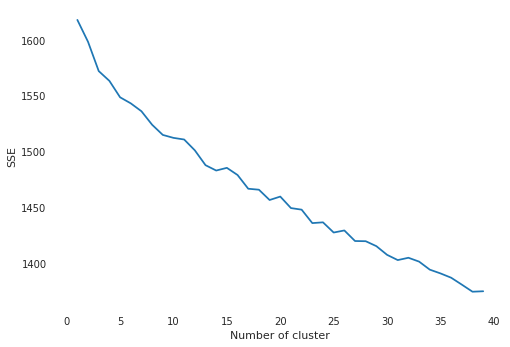

In [0]:
import matplotlib.pyplot as plt

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# Save the Plot in current directory
plt.savefig('elbow_method.png')

In [0]:
# We see that the slope isdiminishing between 35-40, I will choose k = 38
# Running model with 15 different centroid initializations & maximum iterations are 500

model = KMeans(n_clusters=38, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

In [0]:
# Save machine learning model
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [0]:
#interface for user input
def cluster_predict(str_input):
  pass

In [0]:
def recommend_util(str_input):
  pass

In [0]:
# todo next
queries = []

for query in queries:
    res = recommend_util(query)
    print(res)